# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding = "unicode_escape")
pd.set_option('display.max_columns', None)
display(df.head(1))
print(df.shape)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer Street,Customer City,Customer State,Customer Country,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order City,Order State,Order Country,Order Region,Market,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,2,1,911.799988,1939.98999,Late delivery,1,10,Strength Training,XXXXXXXXX,Mary,5533,Harrison,XXXXXXXXX,Consumer,852 Rocky Brook Mountain,Caguas,PR,Puerto Rico,725.0,3,Footwear,18.262022,-66.37059,5533,10/2/2017 12:25,68883,208,60.0,0.03,172197,1999.98999,0.47,1,1999.98999,1939.98999,911.799988,Villenave-d'Ornon,Aquitania-Lemosín-Poitou-Charentes,Francia,Western Europe,Europe,COMPLETE,NaN,208,10,NaN,http://images.acmesports.sports/SOLE+E35+Ellip...,SOLE E35 Elliptical,1999.98999,0,10/4/2017 12:25,First Class


(180519, 53)


In [2]:
df.drop(df[df['Delivery Status'] == 'Shipping canceled'].index, inplace = True)
print(df.shape)

(172765, 53)


In [3]:
df_model = df[['Type', 'Product Name', 'Category Name','Department Name',
               'Customer Segment', "Order Status",'Customer City','Customer State',
               'Customer Country','Order City', 'Order State',
               'Order Country', 'Shipping Mode','Days for shipment (scheduled)',
               'Days for shipping (real)']].copy()

df_model["Difference"] = df_model["Days for shipping (real)"] - df_model["Days for shipment (scheduled)"]

#df_model["Difference"] = df_model["Difference"].map({4:8,3:6,2:4,1:2,0:0,-1:-2,-2:-4})

df_model["Target"] = df_model["Difference"].map({4:1,3:1,2:1,1:1,0:0,-1:0,-2:0})

df_model.drop(columns = ['Days for shipment (scheduled)','Days for shipping (real)'],
                          axis = 1, inplace = True)

df_model.head(6)


,Type,Product Name,Category Name,Department Name,Customer Segment,Order Status,Customer City,Customer State,Customer Country,Order City,Order State,Order Country,Shipping Mode,Difference,Target
0,DEBIT,SOLE E35 Elliptical,Strength Training,Footwear,Consumer,COMPLETE,Caguas,PR,Puerto Rico,Villenave-d'Ornon,Aquitania-Lemosín-Poitou-Charentes,Francia,First Class,1,1
1,DEBIT,SOLE E35 Elliptical,Strength Training,Footwear,Corporate,COMPLETE,Amarillo,TX,EE. UU.,Draguignan,Provenza-Alpes-Costa Azul,Francia,Second Class,0,0
2,DEBIT,SOLE E35 Elliptical,Strength Training,Footwear,Consumer,COMPLETE,Augusta,GA,EE. UU.,Marseille,Provenza-Alpes-Costa Azul,Francia,Standard Class,1,1
3,DEBIT,Dell Laptop,Computers,Technology,Consumer,COMPLETE,Sugar Land,TX,EE. UU.,La Rochelle,Aquitania-Lemosín-Poitou-Charentes,Francia,Same Day,1,1
4,PAYMENT,Dell Laptop,Computers,Technology,Consumer,PENDING_PAYMENT,Caguas,PR,Puerto Rico,Wetzlar,Hesse,Alemania,First Class,1,1
5,TRANSFER,Dell Laptop,Computers,Technology,Consumer,PENDING,West Haven,CT,EE. UU.,Estocolmo,Estocolmo,Suecia,Standard Class,-2,0


In [4]:
df_model.isnull().sum()

Type                0
Product Name        0
Category Name       0
Department Name     0
Customer Segment    0
Order Status        0
Customer City       0
Customer State      0
Customer Country    0
Order City          0
Order State         0
Order Country       0
Shipping Mode       0
Difference          0
Target              0
dtype: int64

# Selecting essential Columns

# Tranforming Columns to Delay Ratio

In [5]:
def col_transformation(col_name):
    
    col_delay_ratio = df_model.groupby(col_name)["Difference"].mean()
    df_model[col_name] = df_model[col_name].map(col_delay_ratio.to_dict())


col_tran_list = ['Type', 'Product Name', 'Category Name','Department Name',
               'Customer Segment', "Order Status",'Customer City','Customer State',
               'Customer Country','Order City', 'Order State',
               'Order Country', 'Shipping Mode']

for col in col_tran_list:
    col_transformation(col)

display(df_model.head(10))

,Type,Product Name,Category Name,Department Name,Customer Segment,Order Status,Customer City,Customer State,Customer Country,Order City,Order State,Order Country,Shipping Mode,Difference,Target
0,0.557544,0.200000,0.642202,0.559427,0.565779,0.562320,0.562264,0.561818,0.561818,0.750000,0.573751,0.602680,1.000000,1,1
1,0.557544,0.200000,0.642202,0.559427,0.557189,0.562320,0.578571,0.568739,0.567790,0.218750,0.639842,0.602680,1.993167,0,0
2,0.557544,0.200000,0.642202,0.559427,0.565779,0.562320,0.517949,0.635759,0.567790,0.618750,0.639842,0.602680,-0.006301,1,1
3,0.557544,0.461176,0.461176,0.573066,0.565779,0.562320,0.511364,0.568739,0.567790,0.506667,0.573751,0.602680,0.479285,1,1
4,0.588928,0.461176,0.461176,0.573066,0.565779,0.588472,0.562264,0.561818,0.561818,-0.121212,0.718826,0.586192,1.000000,1,1
5,0.563650,0.461176,0.461176,0.573066,0.565779,0.572650,0.070588,0.607583,0.567790,0.692042,0.695035,0.638462,-0.006301,-2,0
6,0.557544,0.461176,0.461176,0.573066,0.578836,0.562320,0.562264,0.561818,0.561818,0.604000,0.604000,0.576577,-0.006301,-2,0
7,0.557544,0.461176,0.461176,0.573066,0.557189,0.562320,0.562264,0.561818,0.561818,0.641577,0.537459,0.524743,-0.006301,-2,0
8,0.557544,0.461176,0.461176,0.573066,0.565779,0.562320,0.935897,0.472056,0.567790,0.800000,0.537459,0.524743,-0.006301,1,1
9,0.557544,0.461176,0.461176,0.573066,0.578836,0.562320,0.791667,0.698238,0.567790,0.900000,0.599668,0.586192,0.479285,0,0


# Shubhank Work from here

df_model is the data frame name

In [ ]:
# Anova 


In [24]:
df_model.drop(columns = ['Type'],
                          axis = 1, inplace = True)

display(df_model.head())

,Product Name,Customer City,Customer State,Order City,Order State,Order Country,Shipping Mode,Target
0,0.400000,1.124528,1.123636,1.500000,1.147503,1.205360,2.000000,1
1,0.400000,1.157143,1.137479,0.437500,1.279685,1.205360,3.986334,0
2,0.400000,1.035897,1.271518,1.237500,1.279685,1.205360,-0.012603,1
3,0.922353,1.022727,1.137479,1.013333,1.147503,1.205360,0.958571,1
4,0.922353,1.124528,1.123636,-0.242424,1.437653,1.172384,2.000000,1


In [26]:
df_model["Customer"] = df_model["Customer City"] + df_model["Customer State"]

df_model["Order"] = df_model["Order City"] + df_model["Order State"] + df_model["Order Country"]

display(df_model.head())

,Product Name,Customer City,Customer State,Order City,Order State,Order Country,Shipping Mode,Target,Customer,Order
0,0.400000,1.124528,1.123636,1.500000,1.147503,1.205360,2.000000,1,2.248164,3.852863
1,0.400000,1.157143,1.137479,0.437500,1.279685,1.205360,3.986334,0,2.294621,2.922545
2,0.400000,1.035897,1.271518,1.237500,1.279685,1.205360,-0.012603,1,2.307415,3.722545
3,0.922353,1.022727,1.137479,1.013333,1.147503,1.205360,0.958571,1,2.160206,3.366196
4,0.922353,1.124528,1.123636,-0.242424,1.437653,1.172384,2.000000,1,2.248164,2.367612


In [27]:
df_model.drop(columns = ['Customer City','Customer State',"Order City","Order State","Order Country"],
                          axis = 1, inplace = True)

display(df_model.head())

,Product Name,Shipping Mode,Target,Customer,Order
0,0.400000,2.000000,1,2.248164,3.852863
1,0.400000,3.986334,0,2.294621,2.922545
2,0.400000,-0.012603,1,2.307415,3.722545
3,0.922353,0.958571,1,2.160206,3.366196
4,0.922353,2.000000,1,2.248164,2.367612


# Heatmap for Correlation

<AxesSubplot:>

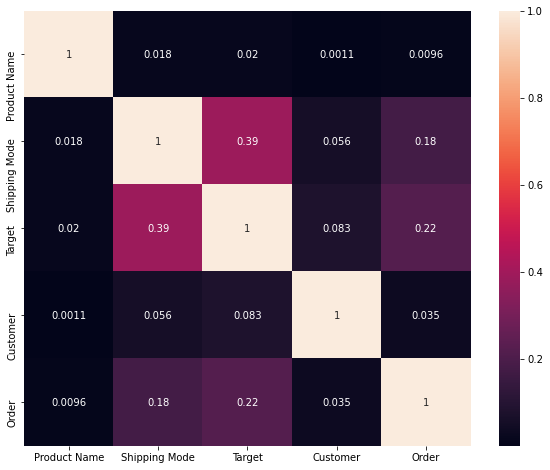

In [28]:
co_mat = df_model.corr()

plt.figure(figsize=(10,8))
sns.heatmap(co_mat,annot=True)

# Building a DT model

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_model.drop("Target",axis=1), 
                                                    df_model["Target"], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

# Evaluation

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     22170
           1       0.83      0.80      0.82     29660

    accuracy                           0.79     51830
   macro avg       0.79      0.79      0.79     51830
weighted avg       0.79      0.79      0.79     51830

[[17393  4777]
 [ 5972 23688]]


# Cross Validation - DT

In [22]:
from sklearn.model_selection import cross_val_score

X_train_cv = df_model.drop("Target",axis=1)
y_train_cv = df_model["Target"]

scores = cross_val_score(dtree, X_train_cv, y_train_cv, cv=10)
print('Cross-Validation Accuracy Scores', scores)

print("\n\n Mean Accuracy Score : ", scores.mean())

Cross-Validation Accuracy Scores [0.84146553 0.86305493 0.86583319 0.86513862 0.8616658  0.86785135
 0.85777958 0.84516092 0.85488539 0.85037046]


 Mean Accuracy Score :  0.8573205767650416


Feature: Type, Score: 0.08274
Feature: Product Name, Score: 0.12019
Feature: Customer City, Score: 0.13964
Feature: Customer State, Score: 0.08508
Feature: Order City, Score: 0.16767
Feature: Order State, Score: 0.11241
Feature: Order Country, Score: 0.09159
Feature: Shipping Mode, Score: 0.20068


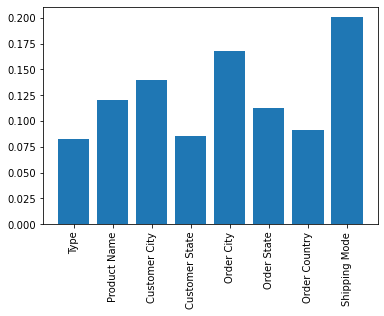

In [46]:
importance = dtree.feature_importances_

col = df_model.columns

for i,v in enumerate(importance):
    print('Feature: '+ col[i] + ', Score: %.5f' % (v))

plt.bar([x for x in range(len(importance))], importance)

col_lis = col.tolist()
col_lis = col_lis[:-1]

xi = list(range(len(col_lis)))
plt.xticks(xi, col_lis, rotation = '90')
plt.show()

# Training Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Predictions and Evaluation

In [14]:
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     24624
           1       0.88      0.86      0.87     29532

   micro avg       0.86      0.86      0.86     54156
   macro avg       0.86      0.86      0.86     54156
weighted avg       0.86      0.86      0.86     54156

[[21074  3550]
 [ 4182 25350]]


# Cross Validation - RF

In [15]:
scores = cross_val_score(rfc, X_train_cv, y_train_cv, cv=10)
print('Cross-Validation Accuracy Scores', scores)

print("\n\n Mean Accuracy Score : ", scores.mean())

Cross-Validation Accuracy Scores [0.86534094 0.87647482 0.88029027 0.87884999 0.88145358 0.88167516
 0.8737536  0.86737577 0.86892693 0.86510443]


 Mean Accuracy Score :  0.8739245490325702
